## WorkFlow

1.Import libraries<br>
2.Get data (convert into tensors)<br>
3.Build a LR model<br>
4.Pick a loss function and optimizer<br>
5.Build a trainning loop<br>
6.Evaluate your model<br>
7.Test model with new datapoint<br>
8.Save the model<br>

### 1.Import Important Libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### 2.Get Data Ready -> (Convert into tensors)

In [ ]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [ ]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

### 3.Building Linear Regression model

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    out = self.linear(x)
    return out


In [ ]:
model = LinearRegression()

In [ ]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.8728]])),
             ('linear.bias', tensor([-0.8192]))])

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.8728]], requires_grad=True),
 Parameter containing:
 tensor([-0.8192], requires_grad=True)]

### 4.Pick a Loss Function and Optimizer

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-4) #0.0001

### 5.Build a Trainning Loop

In [ ]:
num_epochs=1000

In [ ]:
for epoch in range(num_epochs):
  model.train()
  out = model(x_train)
  loss = criterion(y_train,out)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch + 1) % 50 == 0:
    print(f"Epoch : [{epoch + 1}/{num_epochs}], Loss : [{loss.item():.6f}]")

Epoch : [50/1000], Loss : [33.761421]
Epoch : [100/1000], Loss : [14.417630]
Epoch : [150/1000], Loss : [6.294610]
Epoch : [200/1000], Loss : [2.883307]
Epoch : [250/1000], Loss : [1.450500]
Epoch : [300/1000], Loss : [0.848486]
Epoch : [350/1000], Loss : [0.595332]
Epoch : [400/1000], Loss : [0.488667]
Epoch : [450/1000], Loss : [0.443517]
Epoch : [500/1000], Loss : [0.424198]
Epoch : [550/1000], Loss : [0.415727]
Epoch : [600/1000], Loss : [0.411811]
Epoch : [650/1000], Loss : [0.409810]
Epoch : [700/1000], Loss : [0.408614]
Epoch : [750/1000], Loss : [0.407756]
Epoch : [800/1000], Loss : [0.407041]
Epoch : [850/1000], Loss : [0.406388]
Epoch : [900/1000], Loss : [0.405760]
Epoch : [950/1000], Loss : [0.405145]
Epoch : [1000/1000], Loss : [0.404536]


### 6. Evaluate the model

In [ ]:
model.eval()
with torch.no_grad():
  prediction=model(x_train)
prediction.numpy()

array([[0.89996463],
       [1.3976657 ],
       [1.8953664 ],
       [2.4428375 ],
       [2.5423777 ],
       [1.292696  ],
       [3.8314233 ],
       [2.203941  ],
       [2.8409984 ],
       [0.38733274],
       [2.5930526 ],
       [4.289308  ],
       [1.8107574 ],
       [3.0251477 ],
       [0.8094736 ]], dtype=float32)

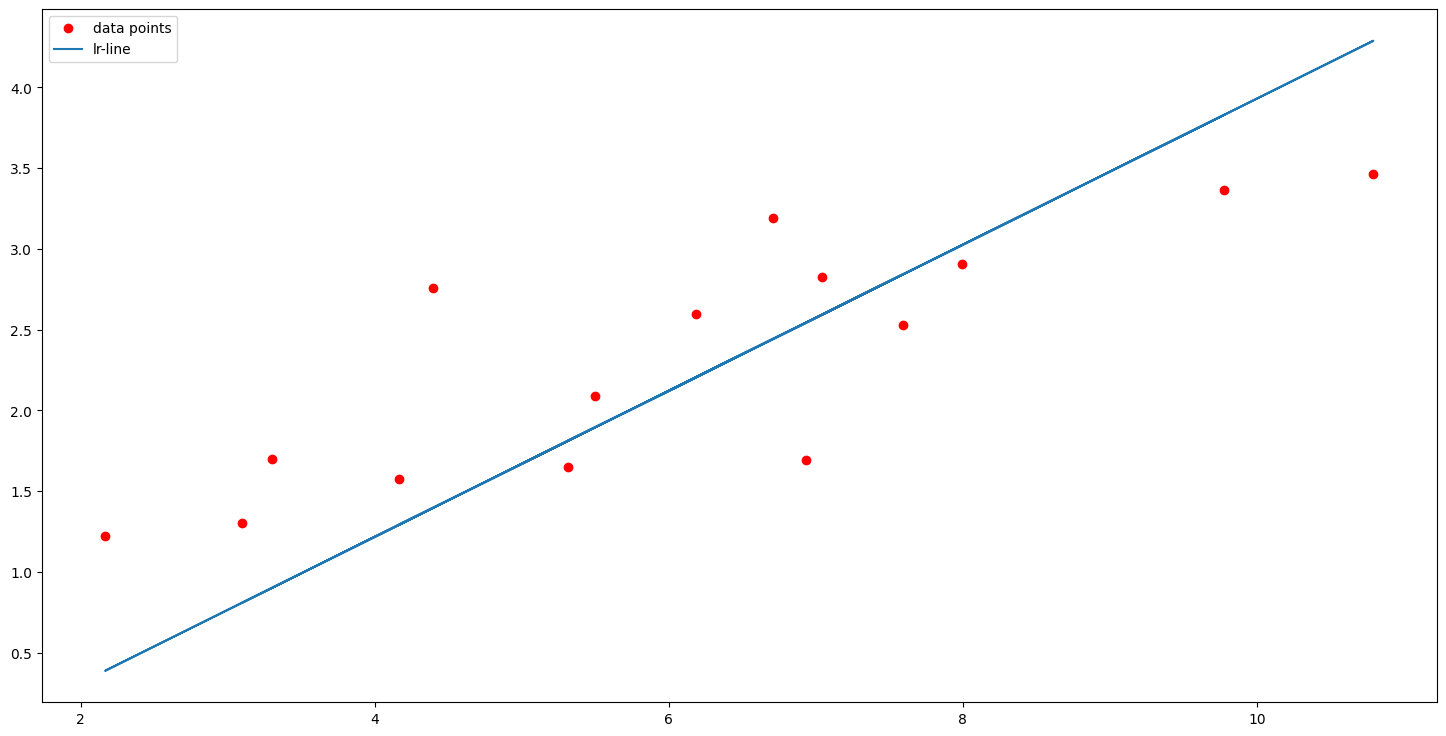

In [ ]:
fig = plt.figure(figsize=(18,9))
plt.plot(x_train,y_train,'ro',label="data points")
plt.plot(x_train,prediction, label="lr-line")
plt.legend()
plt.show()

### 7.Test Model with different datapoint

In [ ]:
new_point = torch.tensor([[8]],dtype=torch.float32)
model.eval()
with torch.no_grad():
  predict = model(new_point)

predict

tensor([[3.0265]])

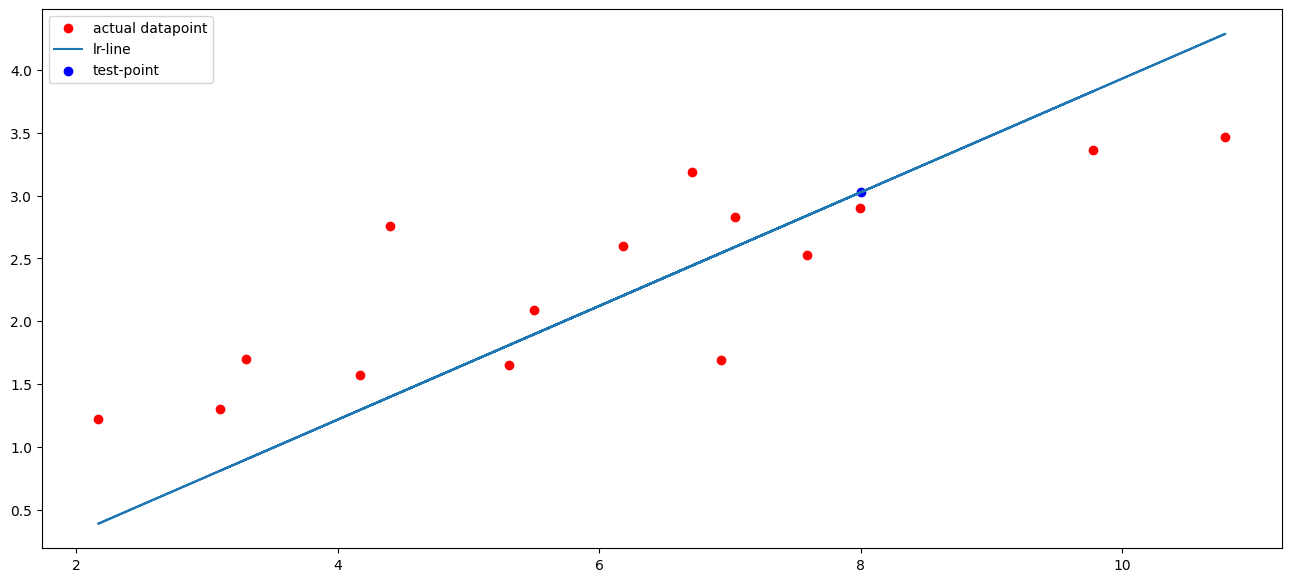

In [ ]:
fig = plt.figure(figsize=(16,7))
plt.plot(x_train,y_train,'ro',label="actual datapoint")
plt.plot(x_train,prediction,label='lr-line')
plt.scatter(new_point,predict,color='b',label='test-point')
plt.legend()
plt.show()

### 8.Save Model (weights and biases)

In [ ]:
torch.save(model.state_dict(),"./model.pth")